<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/c%C3%B3rdoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== RESUMEN (PROMEDIOS EN 52 SEMANAS) ===
Promedio Tuxtepec-Tehuacán (sin Córdoba): 5.761567034602461
Promedio Tuxtepec-Córdoba: 4.358748021857876
Promedio Tehuacán-Córdoba: 4.994236248959035

Promedio ahorro (Tux-Teh) - (Tux-Cor): 1.4028190127445852
Promedio ahorro (Tux-Teh) - (Teh-Cor): 0.7673307856434277


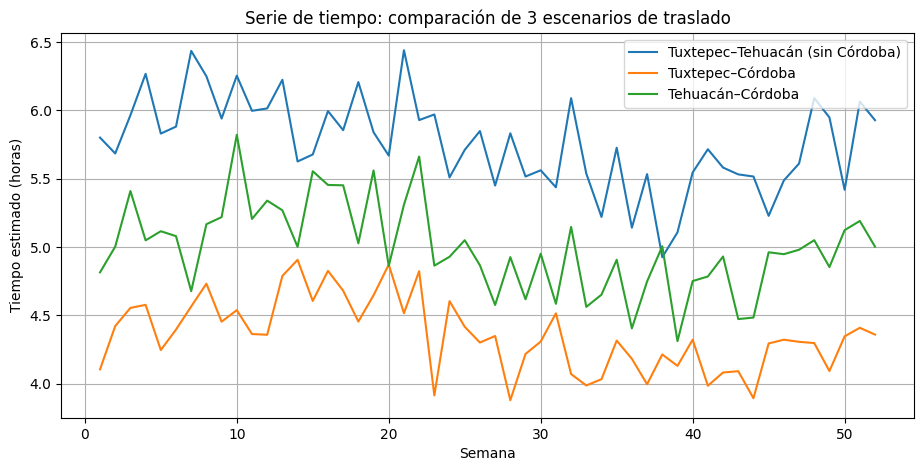

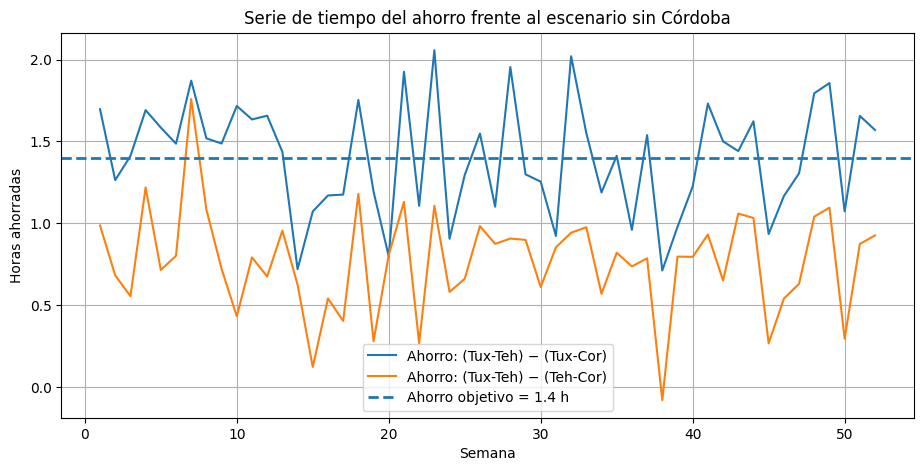


=== PRIMERAS 10 SEMANAS ===
   Semana  Tuxtepec-Tehuacán (sin Córdoba)  Tuxtepec-Córdoba  \
0       1                         5.801480          4.104647   
1       2                         5.685299          4.421462   
2       3                         5.965416          4.554557   
3       4                         6.268244          4.576916   
4       5                         5.830930          4.246134   
5       6                         5.881921          4.395675   
6       7                         6.436312          4.565165   
7       8                         6.250778          4.731787   
8       9                         5.940831          4.453587   
9      10                         6.254804          4.538177   

   Tehuacán-Córdoba  Ahorro (Tux-Teh) vs (Tux-Cor)  \
0          4.814778                       1.696834   
1          5.003269                       1.263837   
2          5.410453                       1.410859   
3          5.049152                       1.691329

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1) CONFIGURACIÓN SERIE DE TIEMPO
# ==========================================
np.random.seed(42)
weeks = np.arange(1, 53)  # 52 semanas

# ==========================================
# 2) TIEMPOS BASE (HORAS) - CONSERVADOR
# ==========================================
# Manteniendo ahorro = 1.4 h para rutas hacia Córdoba
TUX_TEH_BASE = 5.6   # Tuxtepec -> Tehuacán (sin Córdoba)
TUX_COR_BASE = 4.2   # Tuxtepec -> Córdoba  (ahorra 1.4)
TEH_COR_BASE = 4.8   # Tehuacán -> Córdoba  (ahorra 1.4 vs 6.2 hipotético)

# ==========================================
# 3) GENERADOR DE VARIACIÓN REALISTA
# ==========================================
# La idea: cada semana hay pequeñas variaciones por esperas, clima, ventanas, saturación
# pero el orden relativo se mantiene: sin Córdoba > con Córdoba

def time_series(base, amp_season=0.08, amp_noise=0.05, trend=0.0015):
    seasonal = amp_season * np.sin(2*np.pi*weeks/52)     # estacionalidad anual
    noise = np.random.normal(0, amp_noise, len(weeks))   # ruido
    tr = trend * weeks                                   # tendencia leve
    return base * (1 + seasonal + noise + tr)

tux_teh = time_series(TUX_TEH_BASE)
tux_cor = time_series(TUX_COR_BASE)
teh_cor = time_series(TEH_COR_BASE)

# ==========================================
# 4) DATAFRAME DE RESULTADOS
# ==========================================
df = pd.DataFrame({
    "Semana": weeks,
    "Tuxtepec-Tehuacán (sin Córdoba)": tux_teh,
    "Tuxtepec-Córdoba": tux_cor,
    "Tehuacán-Córdoba": teh_cor
})

# Ahorros semanales vs ruta sin Córdoba (Tuxtepec-Tehuacán)
df["Ahorro (Tux-Teh) vs (Tux-Cor)"] = df["Tuxtepec-Tehuacán (sin Córdoba)"] - df["Tuxtepec-Córdoba"]
df["Ahorro (Tux-Teh) vs (Teh-Cor)"] = df["Tuxtepec-Tehuacán (sin Córdoba)"] - df["Tehuacán-Córdoba"]

print("\n=== RESUMEN (PROMEDIOS EN 52 SEMANAS) ===")
print("Promedio Tuxtepec-Tehuacán (sin Córdoba):", df["Tuxtepec-Tehuacán (sin Córdoba)"].mean())
print("Promedio Tuxtepec-Córdoba:", df["Tuxtepec-Córdoba"].mean())
print("Promedio Tehuacán-Córdoba:", df["Tehuacán-Córdoba"].mean())

print("\nPromedio ahorro (Tux-Teh) - (Tux-Cor):", df["Ahorro (Tux-Teh) vs (Tux-Cor)"].mean())
print("Promedio ahorro (Tux-Teh) - (Teh-Cor):", df["Ahorro (Tux-Teh) vs (Teh-Cor)"].mean())

# ==========================================
# 5) GRÁFICA PRINCIPAL (3 ESCENARIOS)
# ==========================================
plt.figure(figsize=(11, 5))
plt.plot(df["Semana"], df["Tuxtepec-Tehuacán (sin Córdoba)"], label="Tuxtepec–Tehuacán (sin Córdoba)")
plt.plot(df["Semana"], df["Tuxtepec-Córdoba"], label="Tuxtepec–Córdoba")
plt.plot(df["Semana"], df["Tehuacán-Córdoba"], label="Tehuacán–Córdoba")
plt.xlabel("Semana")
plt.ylabel("Tiempo estimado (horas)")
plt.title("Serie de tiempo: comparación de 3 escenarios de traslado")
plt.grid(True)
plt.legend()
plt.show()

# ==========================================
# 6) GRÁFICA DE AHORROS (VS SIN CÓRDOBA)
# ==========================================
plt.figure(figsize=(11, 5))
plt.plot(df["Semana"], df["Ahorro (Tux-Teh) vs (Tux-Cor)"], label="Ahorro: (Tux-Teh) − (Tux-Cor)")
plt.plot(df["Semana"], df["Ahorro (Tux-Teh) vs (Teh-Cor)"], label="Ahorro: (Tux-Teh) − (Teh-Cor)")
plt.axhline(1.4, linestyle="--", linewidth=2, label="Ahorro objetivo = 1.4 h")
plt.xlabel("Semana")
plt.ylabel("Horas ahorradas")
plt.title("Serie de tiempo del ahorro frente al escenario sin Córdoba")
plt.grid(True)
plt.legend()
plt.show()

# ==========================================
# 7) TABLA (PRIMERAS 10 SEMANAS)
# ==========================================
print("\n=== PRIMERAS 10 SEMANAS ===")
print(df.head(10))
